In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import glob
import re
import unidecode

In [2]:
def limpiar_y_convertir_precio(precio_str):
    tipo_cambio_usd_mxn = 18.66
    # Manejar valores nulos o no válidos
    if pd.isna(precio_str) or not isinstance(precio_str, str):
        return None

    # Detectar el tipo de moneda
    if precio_str.startswith('USD'):
        # Limpiar el string: quitar "USD " y las comas
        valor_numerico_str = precio_str.replace('USD ', '').replace(',', '')
        try:
            valor_numerico = float(valor_numerico_str)
            # Convertir a MXN
            return int(valor_numerico * tipo_cambio_usd_mxn)
        except ValueError:
            return None
    elif precio_str.startswith('MN'):
        # Limpiar el string: quitar "MN " y las comas
        valor_numerico_str = precio_str.replace('MN ', '').replace(',', '')
        try:
            return int(valor_numerico_str)
        except ValueError:
            return None
    else:
        # Si el formato no coincide, devolver un valor nulo
        return None


In [3]:
# Ruta de los directorios que contienen los archivos CSV
directorio_path = ["/Users/renataramirez/Documents/mlops-repo/data/raw/webscrapping/por_municipio_2025-08-31",
                   "/Users/renataramirez/Documents/mlops-repo/data/raw/webscrapping/por_municipio_2025-09-14", #9227
                   "/Users/renataramirez/Documents/mlops-repo/data/raw/webscrapping/por_municipio_2025-09-20", #10685
                   "/Users/renataramirez/Documents/mlops-repo/data/raw/webscrapping/por_municipio_2025-09-27", #11899]


In [4]:

# Lista para almacenar los DataFrames individuales
lista_dfs = []


In [5]:
archivos_csv = []
# Buscar todos los archivos con la extensión .csv en el directorio
for path in directorio_path:
    archivos = glob.glob(os.path.join(path, "*.csv"))
    archivos_csv = archivos_csv + archivos


In [6]:
len(archivos_csv)

60

In [7]:
# Iterar sobre cada archivo encontrado
for archivo in archivos_csv:
    # Leer el archivo CSV en un DataFrame
    df_temp = pd.read_csv(archivo)

    # Añadir el DataFrame temporal a la lista
    lista_dfs.append(df_temp)

In [8]:
df = pd.concat(lista_dfs, ignore_index=True)
print("DataFrame final creado con éxito. Se añadieron los siguientes archivos:")

DataFrame final creado con éxito. Se añadieron los siguientes archivos:


In [9]:
df.columns

Index(['Título', 'Enlace', 'Precio', 'Dirección', 'Características',
       'Municipio de Origen'],
      dtype='object')

In [10]:
df['Municipio de Origen'].value_counts()

Municipio de Origen
Miguel Hidalgo            9406
Cuauhtémoc                6406
Benito Juárez             3524
Cuajimalpa de Morelos     2656
Álvaro Obregón            2289
Coyoacán                   703
Tlalpan                    507
Gustavo A. Madero          387
Azcapotzalco               377
Iztacalco                  232
Venustiano Carranza        212
La Magdalena Contreras     165
Iztapalapa                 151
Tláhuac                    120
Xochimilco                 120
Name: count, dtype: int64

In [11]:
print("\nPrimeras 5 filas del DataFrame final:")
df.head()


Primeras 5 filas del DataFrame final:


,Título,Enlace,Precio,Dirección,Características,Municipio de Origen
0,Departamento en Renta – San Jerónimo (100 m²) ...,https://www.inmuebles24.com/propiedades/clasif...,"MN 24,000","San Jerónimo Lidice\nSan Jerónimo Lídice, La M...","100 m² lote, 2 rec., 2 baños, 1 estac.",La Magdalena Contreras
1,Departamento remodelado. amueblado. frente al ...,https://www.inmuebles24.com/propiedades/clasif...,"MN 12,000","CALLEJON DEL PRADO\nBarrio San Francisco, La M...","50 m² lote, 1 rec., 1 baño, 1 estac.",La Magdalena Contreras
2,Ph en san jeronimo lidice. Departamento con ma...,https://www.inmuebles24.com/propiedades/clasif...,"MN 34,100","BLVD. ADOLFO RUIZ CORTINES, 2775\nSan Jerónimo...","232 m² lote, 3 rec., 4 baños, 2 estac.",La Magdalena Contreras
3,"Se renta casa de 80m2, más 85m2 de jardines. S...",https://www.inmuebles24.com/propiedades/clasif...,"MN 16,000","Magnolia 26\nSan Jerónimo Lídice, La Magdalena...","165 m² lote, 2 rec., 1 baño, 1 estac.",La Magdalena Contreras
4,"Exclusivo conjunto en Pedregal 2, cuenta con c...",https://www.inmuebles24.com/propiedades/clasif...,"MN 26,000","San Marcos 11\nPedregal 2, La Magdalena Contreras","180 m² lote, 3 rec., 2 baños, 2 estac.",La Magdalena Contreras


In [12]:
df.shape

(27255, 6)

In [13]:
# Remove duplicates
df = df.drop_duplicates()

In [14]:
#9227
df.shape

(12400, 6)

In [15]:
df.dtypes

Título                 object
Enlace                 object
Precio                 object
Dirección              object
Características        object
Municipio de Origen    object
dtype: object

In [16]:
df['Precio'] = df['Precio'].str.strip()

In [17]:
# Transformar el precio a columna númerica
df['precio_mxn'] = df['Precio'].apply(limpiar_y_convertir_precio)


In [18]:
df[df['Precio'] == 'MN 3,849,092'] 

,Título,Enlace,Precio,Dirección,Características,Municipio de Origen,precio_mxn
693,Con una ubicación privilegiada y excelentes am...,https://www.inmuebles24.com/propiedades/clasif...,"MN 3,849,092","bucareli\nJuárez, Cuauhtémoc","76 m² lote, 2 rec., 2 baños, 1 estac.",Cuauhtémoc,3849092.0


In [19]:
row_to_fix = df['Precio'] == 'MN 3,849,092'

# Re-aplica la función corregida solo a esa fila, dividiendo por 100
df.loc[row_to_fix, 'precio_mxn'] = float(
    df.loc[row_to_fix, 'Precio']
    .iloc[0] # Selecciona el valor de la celda específica
    .replace('MN ', '')
    .replace(',', '')
) / 100


In [20]:
df[df['Precio'] == 'MN 3,849,092']

,Título,Enlace,Precio,Dirección,Características,Municipio de Origen,precio_mxn
693,Con una ubicación privilegiada y excelentes am...,https://www.inmuebles24.com/propiedades/clasif...,"MN 3,849,092","bucareli\nJuárez, Cuauhtémoc","76 m² lote, 2 rec., 2 baños, 1 estac.",Cuauhtémoc,38490.92


In [21]:
row_to_fix = df['Precio'] == 'MN 19,250,000'

# Re-aplica la función corregida solo a esa fila, dividiendo por 100
df.loc[row_to_fix, 'precio_mxn'] = float(
    df.loc[row_to_fix, 'Precio']
    .iloc[0] # Selecciona el valor de la celda específica
    .replace('MN ', '')
    .replace(',', '')
) / 1000


In [22]:
df[df['Precio'] == 'MN 19,250,000']

,Título,Enlace,Precio,Dirección,Características,Municipio de Origen,precio_mxn
12052,Departamento en Renta con 2 Recámaras con clos...,https://www.inmuebles24.com/propiedades/clasif...,"MN 19,250,000","Vértiz Narvarte\nNarvarte Oriente, Benito Juárez","60 m² lote, 2 rec., 1 baño, 1 estac.",Benito Juárez,19250.0


In [23]:
# Conjunto para almacenar los nombres de características únicos
caracteristicas_unicas = set()

# Expresión regular para encontrar el nombre de la característica
# Busca un número (y opcionalmente m²) seguido del nombre de la característica
patron = re.compile(r'\d+\s*(?:m²)?\s*([a-záéíóúüñ\s\w]+\b)\.?', re.IGNORECASE)

# Iterar sobre cada fila para analizar la columna 'caracteristicas'
for caracteristicas_str in df['Características']:
    if isinstance(caracteristicas_str, str):
        # Encontrar todas las coincidencias en la cadena
        matches = patron.findall(caracteristicas_str)
        
        # Añadir cada característica encontrada al conjunto
        for match in matches:
            # Limpiar el nombre (eliminar espacios y puntos finales)
            nombre_limpio = match.strip().replace('.', '')
            caracteristicas_unicas.add(nombre_limpio)

In [24]:
caracteristicas_unicas

{'a 143 m² lote',
 'a 2 rec',
 'a 3 rec',
 'a 80 m² lote',
 'a 95 m² lote',
 'baño',
 'baños',
 'estac',
 'lote',
 'rec',
 'un'}

In [25]:
# Con la revisión de outliers vimos que hay lcoales comerciales con precios altos que no deberíamos estar incluyendo, 
# así que creamos esta flag para identificarlos y excluirlos.
# 1. Usar .str.contains() para buscar las palabras "local comercial" (ignorando mayúsculas y minúsculas)
# 2. Usar .astype(int) para convertir True/False a 1/0
df['es_local_comercial'] = df['Título'].str.contains('local comercial', case=False, na=False).astype(int)

In [26]:
df.es_local_comercial.value_counts()

es_local_comercial
0    12391
1        9
Name: count, dtype: int64

In [27]:
df = df[df.es_local_comercial == 0]

In [28]:
# Borramos la columna porque ya no será necesaria
df = df.drop('es_local_comercial', axis = 1)

In [29]:
# Definimos la leyenda a eliminar
leyenda_a_eliminar = '*Aviso de privacidad sugerencias, quejas, aclaraciones, consultar nuestra página. El precio no incluye el mobiliario, electrodomésticos, artículos de decoración y/o arte que pudieran aparecer en las fotografías. El precio de venta no incluye gastos e impuestos de escrituración, o gastos derivados por algún tipo de credito.'

# Eliminamos la leyenda de la columna 'Título'
df['Título'] = df['Título'].str.replace(leyenda_a_eliminar, '', regex=False)

# Opcional: eliminar espacios extra que puedan quedar al final
df['Título'] = df['Título'].str.strip()

In [30]:
# Extraer "lote en m2"
# El patrón busca: (un grupo de dígitos) seguido de " m² lote"
df['lote_m2'] = df['Características'].str.extract(r'(\d+)\s*m²\s*lote', flags=re.IGNORECASE).astype('Int64')

# Extraer "recamaras"
# El patrón busca: (un grupo de dígitos) seguido de " rec." (el punto es opcional)
df['recamaras'] = df['Características'].str.extract(r'(\d+)\s*rec\.?', flags=re.IGNORECASE).astype('Int64')

# Extraer "baños"
# El patrón busca: (un grupo de dígitos) seguido de " baños"
df['baños'] = df['Características'].str.extract(r'(\d+)\s*baño\s?', flags=re.IGNORECASE).astype('Int64')

# Extraer "estacionamiento"
# El patrón busca: (un grupo de dígitos) seguido de " estac" o " estac."
df['estacionamiento'] = df['Características'].str.extract(r'(\d+)\s*estac\.?', flags=re.IGNORECASE).astype('Int64')


In [31]:
df.lote_m2.isnull().sum()

136

In [32]:
df['recamaras'].isnull().sum()

363

In [33]:
df.baños.isnull().sum()

193

In [34]:
df.estacionamiento.isnull().sum()

2924

In [35]:
# por los flatantes en el estacionamiento, cuando no viene en los detalles básicos doblechequeamos que venga en la descripción
# 1. Usar .str.contains() para buscar la palabra "estacionamiento" (ignorando mayúsculas y minúsculas)
# 2. Usar .astype(int) para convertir True/False a 1/0
df['estacionamiento_txt'] = df['Título'].str.contains('estacionamiento', case=False, na=False).astype(int)

In [36]:
# Revisamos el cruce de las columnas de estacionamiento para ver si aporta más información juntarlas y vemos que 
# sí hay reistros donde el estacionamiento estaba vacío e inspeccionando la descripción encontramos más.
pd.crosstab(df['estacionamiento'].fillna(0), df['estacionamiento_txt'])

estacionamiento_txt,0,1
estacionamiento,,
0,1585,1339
1,794,3651
2,604,3472
3,103,528
4,37,208
5,6,18
6,2,25
7,0,1
8,2,11


In [37]:
# Así que complementamos la columna
df['estacionamiento'] = np.where(~df['estacionamiento'].isnull(), df['estacionamiento'], 
                                 np.where((df['estacionamiento'].isnull())&(df['estacionamiento_txt']==1),1,0))

In [38]:
df['estacionamiento'].value_counts()

estacionamiento
1.0     5784
2.0     4076
0.0     1585
3.0      631
4.0      245
6.0       27
5.0       24
8.0       13
12.0       2
22.0       1
7.0        1
11.0       1
13.0       1
Name: count, dtype: int64

Ahora lo mismo para los casos de recámaras y baños que tienen menos nulos

In [39]:
df['recamaras_txt'] = df['Título'].str.contains('recamaras', case=False, na=False).astype(int)
df['recamaras'] = np.where(~df['recamaras'].isnull(), df['recamaras'], 
                                 np.where((df['recamaras'].isnull())&(df['recamaras_txt']==1),1,0))
df['recamaras'].isnull().sum()

0

In [40]:
df['baños_txt'] = df['Título'].str.contains('baño', case=False, na=False).astype(int)
df['baños'] = np.where(~df['baños'].isnull(), df['baños'], 
                                 np.where((df['baños'].isnull())&(df['baños_txt']==1),1,0))
df['baños'].isnull().sum()

0

In [41]:
# 1. Usar .str.contains() para buscar la palabra "renta" (ignorando mayúsculas y minúsculas)
# 2. Usar .astype(int) para convertir True/False a 1/0
df['en_renta'] = df['Título'].str.contains(' renta ', case=False, na=False).astype(int)

In [42]:
df.en_renta.value_counts()

en_renta
1    6232
0    6159
Name: count, dtype: int64

In [43]:
# 1. Usar .str.contains() para buscar la palabra "venta" (ignorando mayúsculas y minúsculas)
# 2. Usar .astype(int) para convertir True/False a 1/0
df['en_venta'] = df['Título'].str.contains(' venta |se vende|preventa|venta departamento', case=False, na=False).astype(int)

In [44]:
df.en_venta.value_counts()

en_venta
0    11972
1      419
Name: count, dtype: int64

In [45]:
pd.crosstab(df.en_renta, df.en_venta)

en_venta,0,1
en_renta,,
0,5984,175
1,5988,244


In [46]:
# para filtrar los departamentos en venta tienen que tener la flag de venta y costo mayor a 1M 
# Y también hay casos en que no ponen un monto de venta pero ponen 1 MXN por poner algo
df = df[((df.en_venta==0)&(df.precio_mxn > 1)&(df.precio_mxn < 1000000))]

In [47]:
df.shape

(11899, 16)

In [48]:
df[(df.en_venta==1)&(df.en_renta==0)].sort_values('precio_mxn',ascending=False)

,Título,Enlace,Precio,Dirección,Características,Municipio de Origen,precio_mxn,lote_m2,recamaras,baños,estacionamiento,estacionamiento_txt,recamaras_txt,baños_txt,en_renta,en_venta


In [49]:
df[(df.en_venta==1)&(df.en_renta==1)]

,Título,Enlace,Precio,Dirección,Características,Municipio de Origen,precio_mxn,lote_m2,recamaras,baños,estacionamiento,estacionamiento_txt,recamaras_txt,baños_txt,en_renta,en_venta


In [50]:
# 1. Usar .str.contains() para buscar la palabra "amueblado" (ignorando mayúsculas y minúsculas)
# 2. Usar .astype(int) para convertir True/False a 1/0
df['es_amueblado'] = df['Título'].str.contains('amueblado', case=False, na=False).astype(int)

In [51]:
df.es_amueblado.value_counts()

es_amueblado
0    8367
1    3532
Name: count, dtype: int64

In [52]:
# 1. Usar .str.contains() para buscar la palabra "amueblado" (ignorando mayúsculas y minúsculas)
# 2. Usar .astype(int) para convertir True/False a 1/0
df['es_penthouse'] = df['Título'].str.contains('penthouse| ph |pentgarden|departamento de lujo', case=False, na=False).astype(int)

In [53]:
df.es_penthouse.value_counts()

es_penthouse
0    11412
1      487
Name: count, dtype: int64

In [54]:
df.isnull().sum()

Título                  1
Enlace                  0
Precio                  0
Dirección               0
Características         3
Municipio de Origen     0
precio_mxn              0
lote_m2                88
recamaras               0
baños                   0
estacionamiento         0
estacionamiento_txt     0
recamaras_txt           0
baños_txt               0
en_renta                0
en_venta                0
es_amueblado            0
es_penthouse            0
dtype: int64

In [55]:
df[df.en_renta == 1].precio_mxn.describe()

count      5985.000000
mean      36810.483375
std       30181.146360
min        2000.000000
25%       19000.000000
50%       28000.000000
75%       43000.000000
max      447840.000000
Name: precio_mxn, dtype: float64

In [56]:
df = df[~df['Enlace'].isin(['https://www.inmuebles24.com/propiedades/clasificado/alclapin-departamento-en-el-rosario-147407511.html'])]

In [57]:
# Queremos identificar outliers
df.sort_values('precio_mxn', ascending=False)[:10]

,Título,Enlace,Precio,Dirección,Características,Municipio de Origen,precio_mxn,lote_m2,recamaras,baños,estacionamiento,estacionamiento_txt,recamaras_txt,baños_txt,en_renta,en_venta,es_amueblado,es_penthouse
3627,Vive la Exclusividad de Rubén Darío: Estrena D...,https://www.inmuebles24.com/propiedades/clasif...,"USD 24,000","Rubén Darío Polanco, Miguel Hidalgo\nPolanco, ...","420 m² lote, 3 rec., 3 baños, 4 estac.",Miguel Hidalgo,447840.0,420,3.0,3.0,4.0,1,0,1,1,0,1,1
2245,"Propiedad Exclusiva, amueblada, equipada y dec...",https://www.inmuebles24.com/propiedades/clasif...,"USD 21,000","Sierra Vertientes 444\nLomas de Chapultepec, M...","1400 m² lote, 5 rec., 5 baños, 8 estac.",Miguel Hidalgo,391860.0,1400,5.0,5.0,8.0,1,0,1,0,0,0,0
803,En uno de los lugares más icónicos de la Roma ...,https://www.inmuebles24.com/propiedades/clasif...,"MN 300,000","Medellin 43\nRoma Norte, Cuauhtémoc","1200 m² lote, 7 rec., 8 baños, 4 estac.",Cuauhtémoc,300000.0,1200,7.0,8.0,4.0,1,0,1,1,0,0,1
10839,"Pentgarden en renta $15, 500 us. En paseo de l...",https://www.inmuebles24.com/propiedades/clasif...,"USD 15,500","Lomas Altas Miguel Hidalgo\nLomas Altas, Migue...","670 m² lote, 4 rec., 4 baños, 6 estac.",Miguel Hidalgo,289230.0,670,4.0,4.0,6.0,1,0,1,1,0,0,1
17691,"Venta: $3, 300, 000 usdrenta: $15, 500 usd670 ...",https://www.inmuebles24.com/propiedades/clasif...,"USD 15,500","Paseo de la Reforma, Lomas Altas, Miguel Hidal...","670 m² lote, 4 rec., 4 baños, 6 estac.",Miguel Hidalgo,289230.0,670,4.0,4.0,6.0,1,1,1,1,0,0,0
10768,"Ph en renta$15, 000 us. Campos eliseos. Polanc...",https://www.inmuebles24.com/propiedades/clasif...,"USD 15,000","Polanco I Sección\nPolanco I Sección, Polanco","450 m² lote, 2 rec., 3 baños, 4 estac.",Miguel Hidalgo,279900.0,450,2.0,3.0,4.0,1,0,1,1,0,0,1
2444,"Precioso ph en la calle de plinio, completamen...",https://www.inmuebles24.com/propiedades/clasif...,"USD 15,000","plinio\nPolanco, Miguel Hidalgo","270 m² lote, 3 rec., 3 baños, 3 estac.",Miguel Hidalgo,279900.0,270,3.0,3.0,3.0,0,0,0,0,0,1,1
5870,Espectacular departamento dentro del club golf...,https://www.inmuebles24.com/propiedades/clasif...,"USD 15,000",Fraccionamiento Club de Golf Bosques de Santa ...,"549 m² lote, 3 rec., 3 baños, 6 estac.",Cuajimalpa de Morelos,279900.0,549,3.0,3.0,6.0,1,1,1,0,0,0,0
2660,Exclusivo departamento en renta. Techos de dob...,https://www.inmuebles24.com/propiedades/clasif...,"USD 15,000","Campos Elíseos\nPolanco, Miguel Hidalgo","450 m² lote, 3 rec., 3 baños, 4 estac.",Miguel Hidalgo,279900.0,450,3.0,3.0,4.0,1,0,1,0,0,0,0
9504,Rubén darío 225 – torre polanco. El edificio r...,https://www.inmuebles24.com/propiedades/clasif...,"USD 15,000","Ruben Dario #225\nPolanco, Miguel Hidalgo","384 m² lote, 3 rec., 4 baños, 4 estac.",Miguel Hidalgo,279900.0,384,3.0,4.0,4.0,1,0,1,0,0,0,1


In [58]:
df

,Título,Enlace,Precio,Dirección,Características,Municipio de Origen,precio_mxn,lote_m2,recamaras,baños,estacionamiento,estacionamiento_txt,recamaras_txt,baños_txt,en_renta,en_venta,es_amueblado,es_penthouse
0,Departamento en Renta – San Jerónimo (100 m²) ...,https://www.inmuebles24.com/propiedades/clasif...,"MN 24,000","San Jerónimo Lidice\nSan Jerónimo Lídice, La M...","100 m² lote, 2 rec., 2 baños, 1 estac.",La Magdalena Contreras,24000.0,100,2.0,2.0,1.0,1,0,1,1,0,0,0
1,Departamento remodelado. amueblado. frente al ...,https://www.inmuebles24.com/propiedades/clasif...,"MN 12,000","CALLEJON DEL PRADO\nBarrio San Francisco, La M...","50 m² lote, 1 rec., 1 baño, 1 estac.",La Magdalena Contreras,12000.0,50,1.0,1.0,1.0,1,0,0,1,0,1,0
2,Ph en san jeronimo lidice. Departamento con ma...,https://www.inmuebles24.com/propiedades/clasif...,"MN 34,100","BLVD. ADOLFO RUIZ CORTINES, 2775\nSan Jerónimo...","232 m² lote, 3 rec., 4 baños, 2 estac.",La Magdalena Contreras,34100.0,232,3.0,4.0,2.0,1,0,1,1,0,0,0
3,"Se renta casa de 80m2, más 85m2 de jardines. S...",https://www.inmuebles24.com/propiedades/clasif...,"MN 16,000","Magnolia 26\nSan Jerónimo Lídice, La Magdalena...","165 m² lote, 2 rec., 1 baño, 1 estac.",La Magdalena Contreras,16000.0,165,2.0,1.0,1.0,1,0,1,1,0,0,0
4,"Exclusivo conjunto en Pedregal 2, cuenta con c...",https://www.inmuebles24.com/propiedades/clasif...,"MN 26,000","San Marcos 11\nPedregal 2, La Magdalena Contreras","180 m² lote, 3 rec., 2 baños, 2 estac.",La Magdalena Contreras,26000.0,180,3.0,2.0,2.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27246,Departamento en Renta – 4° Piso sin Elevador ¡...,https://www.inmuebles24.com/propiedades/clasif...,"MN 11,500",Av Ferrocarriles Nacionales 25\nSantiago Ahuiz...,"68 m² lote, 2 rec., 1 baño, 1 estac.",Azcapotzalco,11500.0,68,2.0,1.0,1.0,1,0,1,1,0,0,0
27248,"Si lo que buscas es un espacio amplio, bien ub...",https://www.inmuebles24.com/propiedades/clasif...,"MN 13,500","45 CALZADA AZCAPOTZALCO LA VILLA\nSanto Tomas,...","120 m² lote, 3 rec., 1 baño, 1 estac.",Azcapotzalco,13500.0,120,3.0,1.0,1.0,1,0,1,1,0,0,0
27249,Departamento Nuevo en 9°piso con 2 Estacionami...,https://www.inmuebles24.com/propiedades/clasif...,"MN 18,000","Inclusiv By marhnos®\nAzcapotzalco, Ciudad de ...","61 m² lote, 2 rec., 2 baños, 2 estac.",Azcapotzalco,18000.0,61,2.0,2.0,2.0,1,0,0,0,0,0,0
27251,"Departamento en Renta Sala, comedor, cocina in...",https://www.inmuebles24.com/propiedades/clasif...,"MN 9,600","Totonacas 6\nTezozomoc, Azcapotzalco","50 m² lote, 1 rec., 1 baño, 1 estac.",Azcapotzalco,9600.0,50,1.0,1.0,1.0,1,0,1,1,0,0,0


## Bag of words

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

# Reemplazar los valores nulos (NaN), lo reemplazamos con una cadena de texto vacía
df['Título'] = df['Título'].fillna('')

# Definimos los stopwords en español
spanish_stopwords = [
    'un', 'una', 'unos', 'unas', 'el', 'la', 'los', 'las', 'de', 'en', 'con',
    'y', 'es', 'son', 'por', 'para', 'del', 'al', 'que', 'se', 'mas', 'más',
    'su', 'sus', 'o', 'tu', 'no', 'así como', 'me', 'cuenta', 'como', 'muy', '24', 
    'lo', 'este', 'sin', 'tiene', 'dos'
]
vectorizer = CountVectorizer(stop_words=spanish_stopwords)
bow_matrix = vectorizer.fit_transform(df['Título'])

# 3. Obtener las palabras y sus frecuencias
vocabulario = vectorizer.get_feature_names_out()
word_counts = bow_matrix.sum(axis=0)

# Crear un DataFrame con las palabras y sus frecuencias
word_freq_df = pd.DataFrame({'Palabra': vocabulario, 'Frecuencia': word_counts.A1})

# 4. Ordenar y seleccionar las 10 palabras más frecuentes
word_freq_df = word_freq_df.sort_values(by='Frecuencia', ascending=False)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['así'] not in stop_words.
  warnings.warn(


In [60]:
df_25p = df.shape[0]/4

In [61]:
top_n = word_freq_df[word_freq_df.Frecuencia > df_25p].shape[0]

In [62]:
word_freq_df.shape

(20579, 2)

In [63]:
top_n*100/word_freq_df.shape[0]

0.17979493658583992

In [64]:
word_freq_df.columns

Index(['Palabra', 'Frecuencia'], dtype='object')

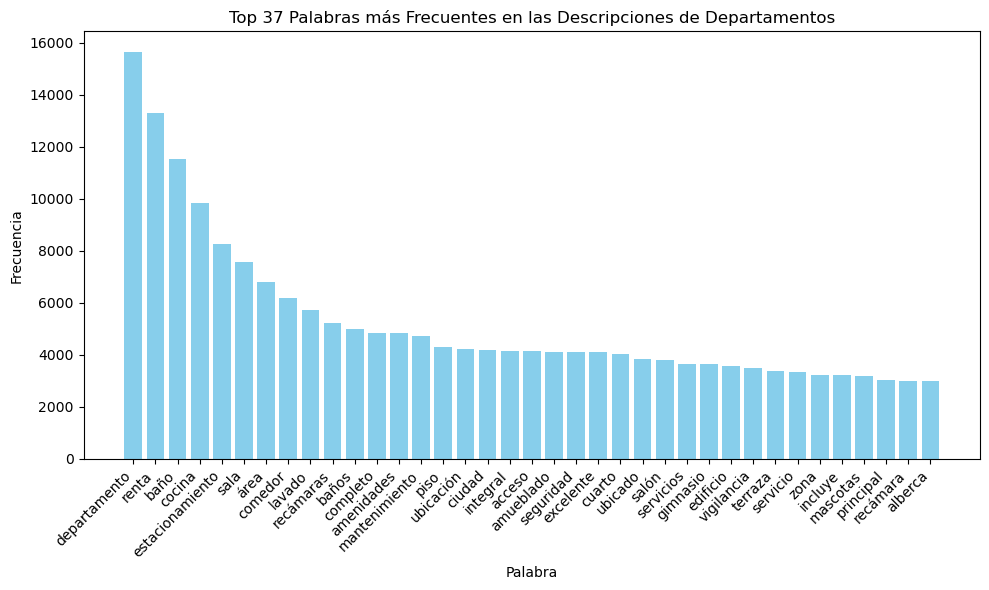

In [65]:

# 5. Generar el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(word_freq_df['Palabra'].head(top_n), word_freq_df['Frecuencia'].head(top_n), color='skyblue')
plt.title(f'Top {top_n} Palabras más Frecuentes en las Descripciones de Departamentos')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Guarda el gráfico como un archivo PNG
plt.savefig('palabras_frecuentes_plot.png')

# Puedes ver el gráfico directamente si trabajas en un entorno interactivo
# plt.show()

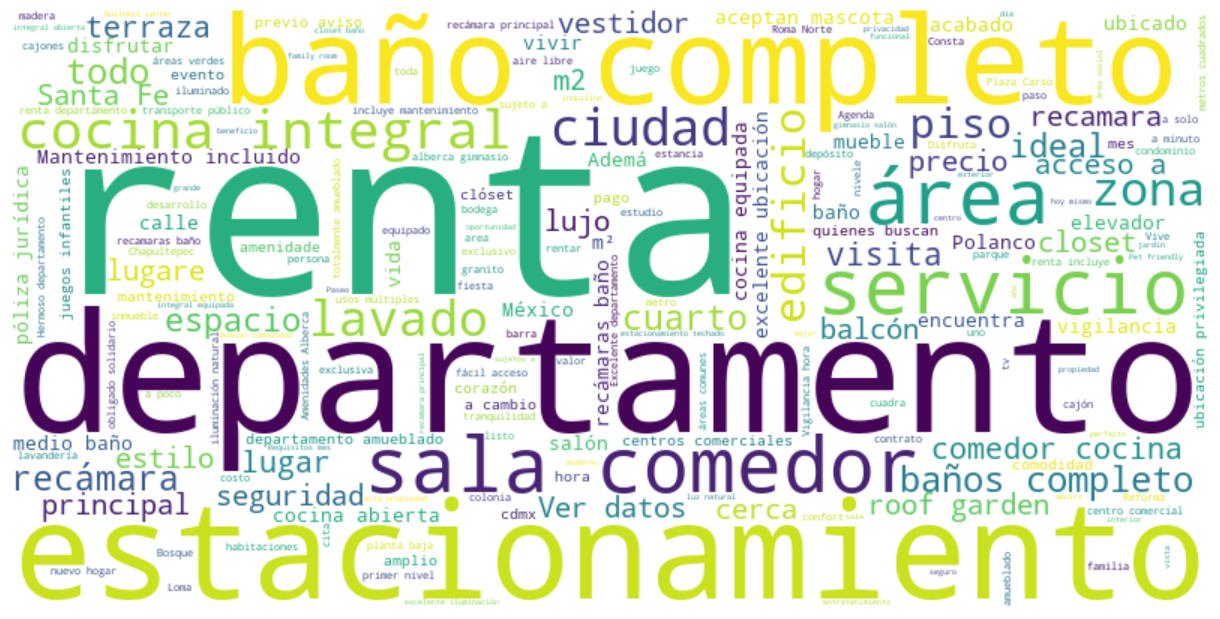

In [66]:
from wordcloud import WordCloud
# 2. Preprocesar el texto
# Combina todas las descripciones en una sola cadena de texto
text = ' '.join(df['Título'])

# 3. Generar la nube de palabras
wordcloud = WordCloud(
    stopwords=spanish_stopwords,
    background_color='white',
    width=800,
    height=400
).generate(text)

# 4. Mostrar el gráfico
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [67]:
pd.set_option('display.max_colwidth', 50)

In [68]:
#df[df.Título.str.contains('cuenta')]

In [69]:
# Sacamos otras características:
df['cuenta_con_cocina_integral'] = df['Título'].str.contains('cocina integral', case=False, na=False).astype(int)
df['cuenta_con_sala'] = df['Título'].str.contains('sala', case=False, na=False).astype(int)
df['cuenta_con_closet'] = df['Título'].str.contains('closet', case=False, na=False).astype(int)
df['cuenta_con_balcon'] = df['Título'].str.contains('balcon', case=False, na=False).astype(int)
df['cuenta_con_gimnasio'] = df['Título'].str.contains('gimnasio', case=False, na=False).astype(int)
df['cuenta_con_alberca'] = df['Título'].str.contains('alberca', case=False, na=False).astype(int)
df['cuenta_con_elevador'] = df['Título'].str.contains('elevador', case=False, na=False).astype(int)
df['cuenta_con_roof_garden'] = df['Título'].str.contains('roof garden', case=False, na=False).astype(int)
df['cuenta_con_terraza'] = df['Título'].str.contains('terraza', case=False, na=False).astype(int)
df['cuenta_con_comedor'] = df['Título'].str.contains('comedor|sala comedor', case=False, na=False).astype(int)
df['cuenta_con_area_de_lavado'] = df['Título'].str.contains('area de lavado', case=False, na=False).astype(int)
df['cuenta_con_salon_usos_multiples'] = df['Título'].str.contains('salón de usos multiples', case=False, na=False).astype(int)
df['cuenta_con_mantenimiento_incluido'] = df['Título'].str.contains('mantenimiento incluido|incluye mantenimiento', case=False, na=False).astype(int)
df['cuenta_con_vigilancia_24_horas'] = df['Título'].str.contains('vigilancia|vigilancia 24 horas|seguridad|seguridad 24 horas', case=False, na=False).astype(int)

In [70]:
# Dividir la columna 'Dirección' y expandir en nuevas columnas
# Usamos r'[,\n]' como la expresión regular para buscar tanto comas como saltos de línea
df_split = df['Dirección'].str.split(r'[,\n]', expand=True)

In [71]:
# df_split.shape[1] devuelve el número de columnas
num_cols = df_split.shape[1]
nombres_columnas = [f'direccion_{i+1}' for i in range(num_cols)]

# Asignar los nuevos nombres de columna
df_split.columns = nombres_columnas

In [72]:
# Concatenar las nuevas columnas con el DataFrame original
df = pd.concat([df, df_split], axis=1)

In [73]:
df.columns

Index(['Título', 'Enlace', 'Precio', 'Dirección', 'Características',
       'Municipio de Origen', 'precio_mxn', 'lote_m2', 'recamaras', 'baños',
       'estacionamiento', 'estacionamiento_txt', 'recamaras_txt', 'baños_txt',
       'en_renta', 'en_venta', 'es_amueblado', 'es_penthouse',
       'cuenta_con_cocina_integral', 'cuenta_con_sala', 'cuenta_con_closet',
       'cuenta_con_balcon', 'cuenta_con_gimnasio', 'cuenta_con_alberca',
       'cuenta_con_elevador', 'cuenta_con_roof_garden', 'cuenta_con_terraza',
       'cuenta_con_comedor', 'cuenta_con_area_de_lavado',
       'cuenta_con_salon_usos_multiples', 'cuenta_con_mantenimiento_incluido',
       'cuenta_con_vigilancia_24_horas', 'direccion_1', 'direccion_2',
       'direccion_3', 'direccion_4', 'direccion_5', 'direccion_6',
       'direccion_7', 'direccion_8', 'direccion_9'],
      dtype='object')

In [74]:
df.isnull().sum().sort_values(ascending=False)

direccion_9                          11890
direccion_8                          11866
direccion_7                          11705
direccion_6                          11572
direccion_5                          11410
direccion_4                          10827
lote_m2                                 87
Características                          3
cuenta_con_salon_usos_multiples          0
cuenta_con_elevador                      0
cuenta_con_roof_garden                   0
cuenta_con_terraza                       0
cuenta_con_comedor                       0
cuenta_con_area_de_lavado                0
direccion_2                              0
cuenta_con_mantenimiento_incluido        0
cuenta_con_vigilancia_24_horas           0
direccion_1                              0
cuenta_con_gimnasio                      0
direccion_3                              0
cuenta_con_alberca                       0
Título                                   0
cuenta_con_balcon                        0
estacionami

In [75]:
df.direccion_1.value_counts()

direccion_1
Polanco                   83
Miguel Hidalgo            74
Miguel Hidalgo            66
Dirección no informada    59
Roma Norte                55
                          ..
LA ROSA                    1
Pomuch                     1
PASEO DE LAS FLORES        1
Picacho Ajusco 886         1
Inclusiv By marhnos®       1
Name: count, Length: 5988, dtype: int64

In [76]:
df['Dirección'].value_counts()

Dirección
Polanco\nPolanco, Miguel Hidalgo                                                        70
Roma Norte\nRoma Norte, Cuauhtémoc                                                      46
Miguel Hidalgo ,lomas de Sotelo\nLomas de Sotelo, Miguel Hidalgo                        31
Campos Elíseos\nPolanco, Miguel Hidalgo                                                 30
Bucareli\nJuárez, Cuauhtémoc                                                            27
                                                                                        ..
Cumbres de Maltrata 304\nNarvarte Oriente, Benito Juárez                                 1
Calle Pitágoras 862\nNarvarte Poniente, Benito Juárez                                    1
Torres Adalid\nDel Valle Centro, Benito Juárez                                           1
Departamento en Renta - Del Valle Sur - 120m2 - Piso 5\nDel Valle Sur, Benito Juárez     1
Inclusiv By marhnos®\nAzcapotzalco, Ciudad de México                            

Esta estrategia de obtener una dirección más limpia no funcionó porque tienen diferentes estructuras.
Tendremos que usar un enfoque diferente para extraer, al menos la colonia, el código postal y la calle con el archivo de Códigos Postales.

In [77]:
df_cp = pd.read_csv('../../data/raw/CP/CPdescarga - Distrito_Federal.csv')


In [78]:
df_cp.head()

,d_codigo,d_asenta,d_tipo_asenta,D_mnpio,d_estado,d_ciudad,d_CP,c_estado,c_oficina,c_CP,c_tipo_asenta,c_mnpio,id_asenta_cpcons,d_zona,c_cve_ciudad
0,1000,San Ángel,Colonia,Álvaro Obregón,Ciudad de México,Ciudad de México,1001,9,1001,NaN,9,10,1,Urbano,1.0
1,1010,Los Alpes,Colonia,Álvaro Obregón,Ciudad de México,Ciudad de México,1001,9,1001,NaN,9,10,5,Urbano,1.0
2,1020,Guadalupe Inn,Colonia,Álvaro Obregón,Ciudad de México,Ciudad de México,1001,9,1001,NaN,9,10,6,Urbano,1.0
3,1030,Axotla,Pueblo,Álvaro Obregón,Ciudad de México,Ciudad de México,1001,9,1001,NaN,28,10,9,Urbano,1.0
4,1030,Florida,Colonia,Álvaro Obregón,Ciudad de México,Ciudad de México,1001,9,1001,NaN,9,10,10,Urbano,1.0


In [79]:
df_cp.d_tipo_asenta.value_counts()

d_tipo_asenta
Colonia         1269
Barrio           160
Pueblo            87
Equipamiento       9
Campamento         3
Aeropuerto         1
Name: count, dtype: int64

In [80]:
df_cp = df_cp[df_cp.d_tipo_asenta.isin(['Colonia', 'Barrio','Pueblo'])]

In [81]:
# Estandarizar texto: quitar acentos, convertir a minúsculas, eliminar espacios extra y reemplazar "\n" por " "
def estandarizar_texto(texto):
    if pd.isna(texto):
        return ""
    texto = texto.replace("\n", " ")  # Reemplazar saltos de línea por espacios
    texto = texto.replace(",", "")  # Quitar comas
    return unidecode.unidecode(texto.strip().lower())


In [82]:
# Estandarizar las columnas necesarias
df['direccion'] = df['Dirección'].apply(estandarizar_texto)
df['municipio'] = df['Municipio de Origen'].apply(estandarizar_texto)
df_cp['d_asenta'] = df_cp['d_asenta'].apply(estandarizar_texto)
df_cp['d_codigo'] = df_cp['d_codigo'].astype(str).apply(estandarizar_texto)

In [83]:
df['direccion'] = df['direccion'].str.replace('santa maria maninalco', 'santa maria malinalco')
df['direccion'] = df['direccion'].str.replace('country club', 'churubusco country club')


In [84]:
# Crear una función para extraer colonia y CP
def extraer_colonia_cp(direccion, df_cp):
    for _, row in df_cp.iterrows():
        if row['d_asenta'] in direccion:
            return row['d_asenta'], row['d_codigo']
    return None, None

In [85]:
# Aplicar la función a cada fila del DataFrame
df[['colonia', 'cp']] = df['direccion'].apply(
    lambda x: pd.Series(extraer_colonia_cp(x, df_cp))
)

In [86]:
df.colonia.isnull().sum() 

96

In [87]:
df.cp.isnull().sum() 

96

In [88]:
df[df.colonia.isnull()]['direccion'].value_counts()

direccion
lindavista lindavista gustavo a. madero                                       7
prolongacion santa tecla 551 coyoacan ciudad de mexico                        5
economia copilco coyoacan                                                     5
calzada ignacio zaragoza 2980 la concordia iztapalapa                         4
av pacifico 312 coyoacan ciudad de mexico                                     4
cerro tikal copilco coyoacan                                                  4
antiguo camino a xochimilco 35 xochimilco ciudad de mexico                    3
economia 17 copilco coyoacan                                                  3
altillo universidad altillo universidad coyoacan                              2
damiana iztapalapa ciudad de mexico                                           2
avenida rio churubusco 331 iztapalapa ciudad de mexico                        2
prados de churubusco prados iztapalapa iztapalapa                             2
real de san martin 103 al 200 

In [89]:
df.colonia.value_counts()

colonia
hidalgo               3445
cuauhtemoc            1834
santa fe               645
cuajimalpa             436
hipodromo              276
                      ... 
centro (area 5)          1
felipe pescador          1
amado nervo              1
americas unidas          1
santiago ahuizotla       1
Name: count, Length: 364, dtype: int64

In [90]:
from geopy.geocoders import Nominatim
import time

In [91]:
# Inicializar el cliente de Nominatim
geolocator = Nominatim(user_agent="mi_aplicacion")

In [92]:
# Función para obtener colonia y código postal usando Nominatim
def completar_colonia_cp(direccion):
    try:
        # Obtener coordenadas de la dirección
        location = geolocator.geocode(direccion)
        if location:
            # Obtener detalles adicionales (como colonia y CP)
            detalles = geolocator.reverse((location.latitude, location.longitude), language="es")
            address = detalles.raw.get('address', {})
            colonia = address.get('neighbourhood', None)
            codigo_postal = address.get('postcode', None)
            return colonia, codigo_postal
        else:
            return None, None
    except Exception as e:
        print(f"Error procesando la dirección '{direccion}': {e}")
        return None, None

In [93]:
# Aplicar la función a las filas donde la columna 'colonia' es nula
def completar_direcciones(df):
    # Filtrar las filas donde 'colonia' es nula
    df_incompleto = df[df['colonia'].isnull()]
    
    # Iterar sobre las filas y completar los datos
    for idx, row in df_incompleto.iterrows():
        colonia, cp = completar_colonia_cp(row['direccion'])
        if colonia:
            df.at[idx, 'colonia'] = str(colonia).replace('colonia ' , '').replace('Colonia ' , '')
        if cp:
            df.at[idx, 'cp'] = cp
        time.sleep(1)  # Respetar el límite de 1 solicitud por segundo de Nominatim
    
    return df

In [94]:
location = geolocator.geocode('avenida rio churubusco 331 iztapalapa, ciudad de mexico  ')
# Obtener detalles adicionales (como colonia y CP)
detalles = geolocator.reverse((location.latitude, location.longitude), language="es")
address = detalles.raw.get('address', {})
colonia = address.get('neighbourhood', None)
codigo_postal = address.get('postcode', None)

In [95]:
address

{'house_number': '331',
 'road': 'Avenida Río Churubusco',
 'neighbourhood': 'Colonia Sinatel',
 'city': 'Ciudad de México',
 'borough': 'Iztapalapa',
 'state': 'Ciudad de México',
 'ISO3166-2-lvl4': 'MX-CMX',
 'postcode': '09080',
 'country': 'México',
 'country_code': 'mx'}

In [96]:
df = completar_direcciones(df)

Error procesando la dirección 'calzada ignacio zaragoza 2980 la concordia iztapalapa': HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=calzada+ignacio+zaragoza+2980+la+concordia+iztapalapa&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


In [97]:
df.colonia.isnull().sum()

30

In [98]:
df.cp.isnull().sum()

28

In [99]:
df[df.colonia.isnull()]['direccion'].value_counts()

direccion
calzada ignacio zaragoza 2980 la concordia iztapalapa                         4
florales coyoacan ciudad de mexico                                            2
eten 600 lindavista gustavo a. madero                                         2
calz. de la viga 1384 iztapalapa ciudad de mexico                             2
lerdo de tejada 110 departamento b-301 iztapalapa ciudad de mexico            2
real de san martin 103 al 200 azcapotzalco ciudad de mexico                   2
prados de churubusco prados iztapalapa iztapalapa                             2
vitrales rinconada del sur xochimilco                                         1
pacifico edificio. j 350 coyoacan ciudad de mexico                            1
norte 86-a 5201 gertrudiz sanchez gustavo a. madero                           1
avenida hacienda de narvarte trabajadores de pemex azcapotzalco               1
privada esfuerzo coyoacan ciudad de mexico                                    1
calle de ferrocarril central 5

In [100]:
df.columns

Index(['Título', 'Enlace', 'Precio', 'Dirección', 'Características',
       'Municipio de Origen', 'precio_mxn', 'lote_m2', 'recamaras', 'baños',
       'estacionamiento', 'estacionamiento_txt', 'recamaras_txt', 'baños_txt',
       'en_renta', 'en_venta', 'es_amueblado', 'es_penthouse',
       'cuenta_con_cocina_integral', 'cuenta_con_sala', 'cuenta_con_closet',
       'cuenta_con_balcon', 'cuenta_con_gimnasio', 'cuenta_con_alberca',
       'cuenta_con_elevador', 'cuenta_con_roof_garden', 'cuenta_con_terraza',
       'cuenta_con_comedor', 'cuenta_con_area_de_lavado',
       'cuenta_con_salon_usos_multiples', 'cuenta_con_mantenimiento_incluido',
       'cuenta_con_vigilancia_24_horas', 'direccion_1', 'direccion_2',
       'direccion_3', 'direccion_4', 'direccion_5', 'direccion_6',
       'direccion_7', 'direccion_8', 'direccion_9', 'direccion', 'municipio',
       'colonia', 'cp'],
      dtype='object')

In [101]:
important_columns = ['precio_mxn', 'lote_m2', 'recamaras', 'baños',
       'estacionamiento', 'es_amueblado', 'es_penthouse',
       'cuenta_con_cocina_integral', 'cuenta_con_sala', 'cuenta_con_closet',
       'cuenta_con_balcon', 'cuenta_con_gimnasio', 'cuenta_con_alberca',
       'cuenta_con_elevador', 'cuenta_con_roof_garden', 'cuenta_con_terraza',
       'cuenta_con_comedor', 'cuenta_con_area_de_lavado',
       'cuenta_con_salon_usos_multiples', 'cuenta_con_mantenimiento_incluido',
       'cuenta_con_vigilancia_24_horas', 'direccion',
       'colonia', 'cp', 'municipio']

In [102]:
df.municipio.value_counts()

municipio
miguel hidalgo            3857
cuauhtemoc                2663
benito juarez             1782
cuajimalpa de morelos     1066
alvaro obregon             999
coyoacan                   376
tlalpan                    223
azcapotzalco               201
gustavo a. madero          191
iztacalco                  129
venustiano carranza        107
iztapalapa                  83
tlahuac                     77
xochimilco                  77
la magdalena contreras      67
Name: count, dtype: int64

In [103]:
df[df.colonia.isnull() == False][important_columns].to_parquet('../../data/processed/inmuebles24_departamentos_20250927.parquet', index=False)